In [1]:
import pandas as pd
import numpy as nu
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

vd = pd.read_csv('data/country_vaccinations.csv')
vd = vd[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
vd['date'] = pd.to_datetime(vd['date'])
display(vd.info())

cd = pd.read_csv('data/covid_data.csv')

cd['date'] = pd.to_datetime(cd['date'])
display(cd.info())

cd = cd.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

cd['active'] = cd['confirmed'] - cd['deaths'] - cd['recovered']

cd = cd.sort_values(by=['country', 'date'])
cd['daily_confirmed'] = cd.groupby('country')['confirmed'].diff()
cd['daily_deaths'] = cd.groupby('country')['deaths'].diff()
cd['daily_recovered'] = cd.groupby('country')['recovered'].diff()

display(cd['date'].min())
display(cd['date'].max())

display(vd['date'].min())
display(vd['date'].max())

c_df = cd.merge(vd, how='left')
print(c_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42795 entries, 0 to 42794
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              42795 non-null  object        
 1   date                                 42795 non-null  datetime64[ns]
 2   total_vaccinations                   23457 non-null  float64       
 3   people_vaccinated                    22371 non-null  float64       
 4   people_vaccinated_per_hundred        22371 non-null  float64       
 5   people_fully_vaccinated              19462 non-null  float64       
 6   people_fully_vaccinated_per_hundred  19462 non-null  float64       
 7   daily_vaccinations                   42558 non-null  float64       
 8   vaccines                             42795 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 2.9+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            306429 non-null  datetime64[ns]
 1   province/state  228329 non-null  object        
 2   country         306429 non-null  object        
 3   confirmed       306429 non-null  float64       
 4   deaths          306429 non-null  float64       
 5   recovered       306429 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 14.0+ MB


None

Timestamp('2020-01-22 00:00:00')

Timestamp('2021-05-29 00:00:00')

Timestamp('2020-12-02 00:00:00')

Timestamp('2021-09-06 00:00:00')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86785 entries, 0 to 86784
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 86785 non-null  datetime64[ns]
 1   country                              86785 non-null  object        
 2   confirmed                            86785 non-null  float64       
 3   deaths                               86785 non-null  float64       
 4   recovered                            86785 non-null  float64       
 5   active                               86785 non-null  float64       
 6   daily_confirmed                      86564 non-null  float64       
 7   daily_deaths                         86564 non-null  float64       
 8   daily_recovered                      86564 non-null  float64       
 9   total_vaccinations                   10629 non-null  float64       
 10  people_vac

count    86564.000000
mean        40.820618
std        198.349234
min      -5337.000000
25%          0.000000
50%          1.000000
75%         10.000000
max       4561.000000
Name: death_rate, dtype: float64

count     86564.000000
mean       1963.295492
std       11895.703910
min     -348667.000000
25%           1.000000
50%          55.000000
75%         622.000000
max      823225.000000
Name: recover_rate, dtype: float64

Taiwan                 494
Japan                  494
Thailand               494
South Korea            494
United States          494
                      ... 
Channel Islands          1
Cape Verde               1
North Ireland            1
East Timor               1
Republic of Ireland      1
Name: country, Length: 221, dtype: int64

count     493.000000
mean     1205.488844
std      1000.122034
min         0.000000
25%       503.000000
50%       960.000000
75%      1593.000000
max      4561.000000
Name: daily_deaths, dtype: float64

9538.061983471074

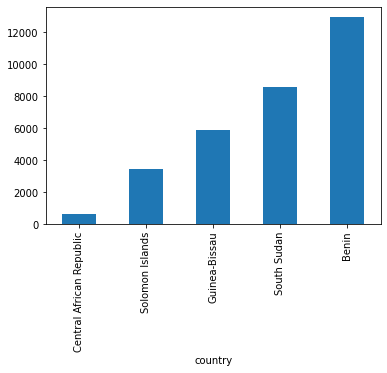

In [9]:
c_df = c_df.sort_values(by=['country', 'date'])
c_df['death_rate']=c_df.groupby('country')['deaths'].diff()
c_df['recover_rate']=c_df.groupby('country')['confirmed'].diff()
display(c_df['death_rate'].describe())
display(c_df['recover_rate'].describe())
display(c_df['country'].value_counts())

display(c_df[c_df['country']=='United States']['daily_deaths'].describe())
display(c_df[c_df['country']=='Russia']['daily_recovered'].mean())

c_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');